This is a model that predicts a Pokémon's type based on its stats (e.g. HP, Attack, Defense).

In [ ]:
from pathlib import Path
import kagglehub
import pandas as pd


def load_pokemon_data():
  # # Download latest version
  path = kagglehub.dataset_download("divyanshusingh369/complete-pokemon-library-32k-images-and-csv")

  print("Path to dataset files:", path)

  return pd.read_csv(path + "/pokemonDB_dataset.csv")

In [ ]:
data = load_pokemon_data()

Path to dataset files: /root/.cache/kagglehub/datasets/divyanshusingh369/complete-pokemon-library-32k-images-and-csv/versions/1


In [ ]:
data.head()

,Pokemon,Type,Species,Height,Weight,Abilities,EV Yield,Catch Rate,Base Friendship,Base Exp,...,Defense Max,Special Attack Base,Special Attack Min,Special Attack Max,Special Defense Base,Special Defense Min,Special Defense Max,Speed Base,Speed Min,Speed Max
0,Abomasnow,"Grass, Ice",Frost Tree Pokémon,2.2 m (7′03″),135.5 kg (298.7 lbs),"1. Snow Warning, Soundproof (hidden ability)","1 Attack, 1 Sp. Atk","60 (7.8% with PokéBall, full HP)",50 (normal),173,...,273,92,170,311,85,157,295,60,112,240
1,Mega Abomasnow,"Grass, Ice",Frost Tree Pokémon,2.7 m (8′10″),185.0 kg (407.9 lbs),1. Snow Warning,"1 Attack, 1 Sp. Atk","60 (7.8% with PokéBall, full HP)",50 (normal),208,...,339,132,242,399,105,193,339,30,58,174
2,Abra,Psychic,Psi Pokémon,0.9 m (2′11″),19.5 kg (43.0 lbs),"1. Synchronize, 2. Inner Focus, Magic Guard (h...",1 Sp. Atk,"200 (26.1% with PokéBall, full HP)",50 (normal),62,...,141,105,193,339,55,103,229,90,166,306
3,Absol,Dark,Disaster Pokémon,1.2 m (3′11″),47.0 kg (103.6 lbs),"1. Pressure, 2. Super Luck, Justified (hidden ...",2 Attack,"30 (3.9% with PokéBall, full HP)",35 (lower than normal),163,...,240,75,139,273,60,112,240,75,139,273
4,Mega Absol,Dark,Disaster Pokémon,1.2 m (3′11″),49.0 kg (108.0 lbs),1. Magic Bounce,2 Attack,"30 (3.9% with PokéBall, full HP)",35 (lower than normal),198,...,240,115,211,361,60,112,240,115,211,361


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215 entries, 0 to 1214
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Pokemon               1215 non-null   object
 1   Type                  1215 non-null   object
 2   Species               1215 non-null   object
 3   Height                1215 non-null   object
 4   Weight                1215 non-null   object
 5   Abilities             1215 non-null   object
 6   EV Yield              1215 non-null   object
 7   Catch Rate            1215 non-null   object
 8   Base Friendship       1215 non-null   object
 9   Base Exp              1215 non-null   object
 10  Growth Rate           1215 non-null   object
 11  Egg Groups            1215 non-null   object
 12  Gender                1215 non-null   object
 13  Egg Cycles            1215 non-null   object
 14  HP Base               1215 non-null   int64 
 15  HP Min                1215 non-null   

In [ ]:
data.describe()

,HP Base,HP Min,HP Max,Attack Base,Attack Min,Attack Max,Defense Base,Defense Min,Defense Max,Special Attack Base,Special Attack Min,Special Attack Max,Special Defense Base,Special Defense Min,Special Defense Max,Speed Base,Speed Min,Speed Max
count,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000
mean,71.244444,252.397531,346.320165,81.152263,150.073251,286.658436,75.007407,139.011523,273.128395,73.224691,135.795885,269.203292,72.441152,134.396708,267.483951,70.034568,130.066667,262.236214
std,26.927819,54.187278,54.611949,32.037134,57.676629,70.480682,30.740999,55.341860,67.633071,32.757152,58.970125,72.081381,27.578188,49.643447,60.674744,30.161298,54.294135,66.380519
min,1.000000,1.000000,1.000000,5.000000,13.000000,119.000000,5.000000,13.000000,119.000000,10.000000,22.000000,130.000000,20.000000,40.000000,152.000000,5.000000,13.000000,119.000000
25%,52.000000,214.000000,308.000000,57.000000,107.000000,234.000000,52.000000,98.000000,223.000000,50.000000,94.000000,218.000000,51.000000,96.000000,221.000000,45.000000,85.000000,207.000000
50%,70.000000,250.000000,344.000000,80.000000,148.000000,284.000000,70.000000,130.000000,262.000000,65.000000,121.000000,251.000000,70.000000,130.000000,262.000000,68.000000,126.000000,258.000000
75%,85.000000,280.000000,374.000000,100.000000,184.000000,328.000000,91.000000,168.000000,309.000000,95.000000,175.000000,317.000000,90.000000,166.000000,306.000000,91.000000,168.000000,309.000000
max,255.000000,620.000000,714.000000,190.000000,346.000000,526.000000,250.000000,454.000000,658.000000,194.000000,353.000000,535.000000,250.000000,454.000000,658.000000,200.000000,364.000000,548.000000


In [ ]:
import numpy as np
import math

def prepare_pokemon_data(data, test_ratio=0.2, random_seed=42):
    np.random.seed(random_seed)
    shuffled = data.sample(frac=1, random_state=random_seed)
    border_value = math.floor(len(data) * test_ratio)

    test_set = shuffled.iloc[:border_value]
    train_set = shuffled.iloc[border_value:]

    return train_set, test_set


In [ ]:
base_stats = ['HP Base', 'Attack Base', 'Defense Base', 'Speed Base', 'Special Attack Base', 'Special Defense Base', 'Type']
pokemons = data[base_stats]

pokemons['Type'] = pokemons['Type'].apply(lambda x: x.split(', '))

<ipython-input-7-c4908e60a433>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pokemons['Type'] = pokemons['Type'].apply(lambda x: x.split(', '))


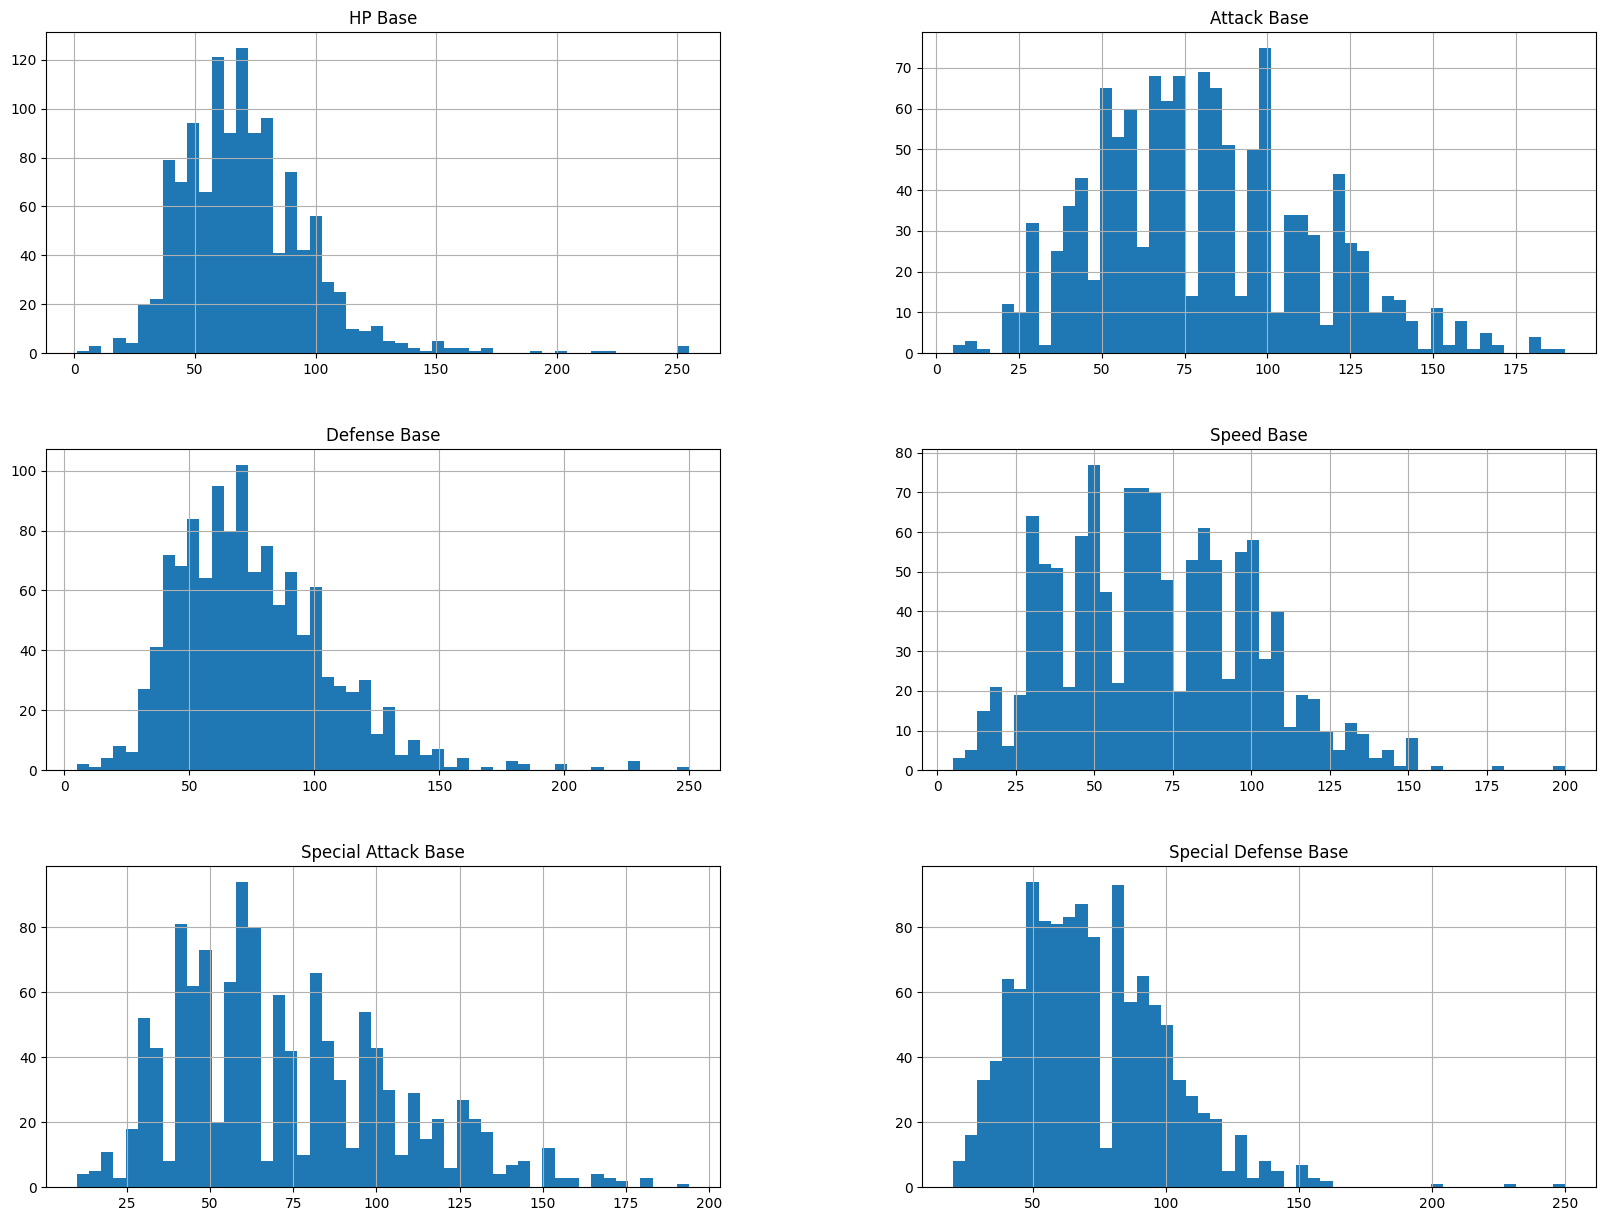

In [ ]:
import matplotlib.pyplot as plt

pokemons.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
encoded_labels = mlb.fit_transform(pokemons['Type'])

encoded_labels_df = pd.DataFrame(encoded_labels, columns=mlb.classes_)

In [ ]:
X = pokemons[['HP Base', 'Attack Base', 'Defense Base', 'Speed Base', 'Special Attack Base', 'Special Defense Base']]

train_label, test_label = prepare_pokemon_data(encoded_labels_df)
train_traits, test_traits = prepare_pokemon_data(X)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, MultiLabelBinarizer

tree_reg = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeRegressor(random_state=42))
])

tree_reg.fit(train_traits, train_label)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', DecisionTreeRegressor(random_state=42))])

In [ ]:
pokemon_predictions = tree_reg.predict(X)

In [ ]:
from sklearn.metrics import mean_squared_error

pokemon_rmse = mean_squared_error(encoded_labels_df, pokemon_predictions)

In [ ]:
pokemon_rmse

0.030051313316059543

In [ ]:
bulbasaur_stats = pd.DataFrame([{
    'HP Base': 45,
    'Attack Base': 49,
    'Defense Base': 49,
    'Speed Base': 45,
    'Special Attack Base': 65,
    'Special Defense Base': 65
}])

predicted_type = tree_reg.predict(bulbasaur_stats)

In [ ]:
predicted_labels = (predicted_type >= 0.5).astype(int)

decoded_labels = mlb.inverse_transform(predicted_labels)

print("🔮 Predicted type:", decoded_labels[0])

🔮 Predicted type: ('Grass', 'Poison')
